In [1]:
#importing the needed libraries

import pandas as pd
import numpy as np

import glob
import matplotlib.pyplot as plt

import datetime

In [2]:
#importing plotly libraries

import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

C:\Users\walid\AppData\Local\Temp\ipykernel_19572\866894956.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\walid\AppData\Local\Temp\ipykernel_19572\866894956.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
'''
This code sesction reads all countries csv files, inserts a countryCode column respectively and combine all countries
in one large dataset with shape of (375942, 18 )
'''


'''
path = "C:/Users/walid/ISP492-Data Science/CourseWorkDB/Youtube/YoutubeCsv/"

all_files = glob.glob(path + "*.csv")
all_files

df_li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 0, encoding='latin-1') #encoding is latin because error on utf-8
    df.insert(0, "country", filename[-12:-10]) #adding the country from the files' names
    df_li.append(df)
df_li[1]
df = pd.concat(df_li,axis = 0, ignore_index = True)


creating a csv file from all combined datframes
df.to_csv('C:/Users/walid/ISP492-Data Science/CourseWorkDB/Youtube/YoutubeCsv/sample.csv')   

'''




In [2]:
df = pd.read_csv('C:/Users/walid/ISP492-Data Science/CourseWorkDB/Youtube/YoutubeCsv/sample.csv')

In [3]:
df.dtypes

Unnamed: 0                 int64
country                   object
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [4]:
#checking for null values
df.isna().sum()

Unnamed: 0                    0
country                       0
video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
dtype: int64

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Unnamed: 0                0.000000
country                   0.000000
video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               5.181118
dtype: float64

In [6]:
df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [7]:
print(df.category_id.value_counts().sort_index())

print(df.category_id.value_counts().sort_values())


print("sum of unique values is: {}".format(df.category_id.value_counts().sum()))

1      20932
2       4734
10     42514
15      4863
17     23684
19      1776
20     11498
22     54052
23     26970
24    109006
25     37288
26     18856
27      7788
28      8171
29      2795
30        36
43       974
44         5
Name: category_id, dtype: int64
44         5
30        36
43       974
19      1776
29      2795
2       4734
15      4863
27      7788
28      8171
20     11498
26     18856
1      20932
17     23684
23     26970
25     37288
10     42514
22     54052
24    109006
Name: category_id, dtype: int64
sum of unique values is: 375942


In [8]:
categories_dict = {
  1: "Film & Animation", #1
  2: "Autos & Vehicles", #2
  10: "Music",   
  15: "Pets & Animals", 
  17: "Sports",  
  18: "Short Movies",  
  19: "Travel & Events", 
  20: "Gaming",
  21: "Videoblogging",  
  22:  "People & Blogs",  
  23: "Comedy",
  24: "Entertainment",
  25: "News & Politics",  
  26: "Howto & Style", 
  27: "Education", 
  28: "Science & Technology", 
  30: "Movies",  
  31: "Anime/Animation", 
  32: "Action/Adventure", 
  33: "Classics",  
  34: "Comedy",  
  35: "Documentary",
  36: "Drama", 
  37: "Family", 
  38: "Foreign",  
  39: "Horror", 
  40: "Sci-Fi/Fantasy", 
  41: "Thriller", 
  42: "Shorts",   
  43: "Shows", 
  44: "Trailers"
    
}

df['category_txt'] = df['category_id'].map(categories_dict)

In [11]:
print(df.category_txt.value_counts().sort_values(ascending=False))

Entertainment           109006
People & Blogs           54052
Music                    42514
News & Politics          37288
Comedy                   26970
Sports                   23684
Film & Animation         20932
Howto & Style            18856
Gaming                   11498
Science & Technology      8171
Education                 7788
Pets & Animals            4863
Autos & Vehicles          4734
Travel & Events           1776
Shows                      974
Movies                      36
Trailers                     5
Name: category_txt, dtype: int64


In [12]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
#df['publish_time'] = pd.to_datetime(df['publish_time'], format='%y.%d.%m')

In [31]:
df_sample = df.sample(n=1000)

In [32]:
df_sample

,Unnamed: 0,country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_txt,publish_date,publish_hrs
38050,38050,CA,vUltH53kldI,2018-05-31,Tamera: Trust Your Instincts As a Mom,The Real Daytime,24,2018-05-30T16:00:04.000Z,"the real|""daytime""|""talk show""|""women""|""tamera...",44417,...,14,68,https://i.ytimg.com/vi/vUltH53kldI/default.jpg,False,False,False,NaN,Entertainment,NaN,NaN
190435,190435,IN,L-cVCS_PIzs,2018-04-30,Azhagu - Tamil Serial | à® à®´à®à¯ | Episode...,Vision Time Tamil,24,2018-04-29T12:57:17.000Z,"Azhagu|""à® à®´à®à¯""|""Azhagu Tamil Serial""|""F...",262540,...,279,113,https://i.ytimg.com/vi/L-cVCS_PIzs/default.jpg,False,False,False,Azhagu Tamil Serial latest Full Episode 133 Te...,Entertainment,NaN,NaN
289170,289170,MX,4xv0y-Ddwjo,2018-05-18,Buenas Noches y Dulces SueÃ±os - Abrelo - El ...,Inspira Positivo,24,2018-05-17T23:04:10.000Z,"reflexion|""reflexiones""|""video de reflexion""|""...",17402,...,25,30,https://i.ytimg.com/vi/4xv0y-Ddwjo/default.jpg,False,False,False,Buenas nochesFrases Bonito vÃ­deo de reflexiÃ³...,Entertainment,NaN,NaN
319338,319338,RU,H1ctddsDNi8,2018-03-21,3D ÑÐ²ÐµÑÐ¾Ðº Ð½Ð° Ð½Ð¾Ð³Ð¾ÑÐºÐ°Ñ ÐÐÐÐ...,Ð®Ð»Ð¸Ñ Crazy Nails,22,2018-03-20T11:00:01.000Z,"ÑÐ²ÐµÑÑ Ð½Ð° Ð½Ð¾Ð³ÑÑÑ |""Ð¼Ð°Ð½Ð¸ÐºÑÑ Ð...",21681,...,18,175,https://i.ytimg.com/vi/H1ctddsDNi8/default.jpg,False,False,False,Ð¡Ð°Ð¹Ñ Roxy :https://roxynail.ru/\nÐÑÑÐ¿Ð...,People & Blogs,NaN,NaN
294921,294921,RU,H2pvLy1KYsY,2017-11-17,Ð¢Ð¾Ð¿5 ÐÐÐÐÐÐ«Ð¥ ÐÐ¾Ð½ÑÐ¾Ð²!,telblog.net,24,2017-11-16T13:29:51.000Z,"ÑÐµÐ¹Ð»Ñ|""fail""|""Ð¼Ð°ÑÐ¸Ð½Ñ""|""Ð·Ð²ÑÐº""|""Ñ...",242811,...,2144,2023,https://i.ytimg.com/vi/H2pvLy1KYsY/default.jpg,False,False,False,ÐÐ½Ð²ÐµÑÑÐ¸ÑÑÐ¹ Ð¸ Ð·Ð°ÑÐ°Ð±Ð°ÑÑÐ²Ð°Ð¹...,Entertainment,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45515,45515,DE,tvg2q9tkjdU,2017-12-07,Verschiedene NationalitÃ¤ten beim aufwachen,Achi der Entertainer,23,2017-12-05T19:40:11.000Z,[none],55067,...,208,384,https://i.ytimg.com/vi/tvg2q9tkjdU/default.jpg,False,False,False,NaN,Comedy,NaN,NaN
317841,317841,RU,HNvqPohOccA,2018-03-14,ÐÐÐ ÐÐ® Ð CS:GO ÐÐÐÐÐÐÐ [ÐÐÐ ÐÐ...,Fenyastr CS:GO,20,2018-03-12T11:29:39.000Z,"CSGO|""CS:GO""|""COUNTER""|""STRIKE""|""GLOBAL""|""OFFE...",244197,...,359,2236,https://i.ytimg.com/vi/HNvqPohOccA/default.jpg,False,False,False,ÐÐ³ÑÐ°ÑÑ Ð½Ð° CSGO500 - https://goo.gl/mBU...,Gaming,NaN,NaN
55844,55844,DE,mWCf82qY9xE,2018-01-29,"U23 VIá»T NAM , TRAO GIáº¢I Táº I SÃN Má»¸ Ä...",GIANG Há» Báº®C NAM Háº¢I PHÃNG,17,2018-01-28T14:53:29.000Z,"U23 VIá»T NAM|""TRAO""|""TRAO GIáº¢I""|""TRAO GIáº...",1670184,...,1033,1586,https://i.ytimg.com/vi/mWCf82qY9xE/default.jpg,False,False,False,"https://youtu.be/D3gQxvCAhRc\nU23 VIá»T NAM ,...",Sports,NaN,NaN
303769,303769,RU,nVBXjnssqr0,2017-12-31,ÐÐÐÐÐ¦ÐÐÐ¡ÐÐÐ ÐÐ¢ÐÐ¯ÐÐ Ð¢ÐÐ§ÐÐ£...,ILYA STREKAL,2,2017-12-29T13:00:24.000Z,"ÐÐ»ÑÑ|""Ð¡ÑÑÐµÐºÐ°Ð»Ð¾Ð²ÑÐºÐ¸Ð¹""",783689,...,1419,1895,https://i.ytimg.com/vi/nVBXjnssqr0/default.jpg,False,False,False,ÐÐ¾Ð¹ Instagram - https://instagram.com/ilya_...,Autos & Vehicles,NaN,NaN


In [33]:
df_sample[['publish_date', 'publish_hrs']] = df_sample['publish_time'].str.split('T', expand=True)

In [34]:
df_sample

,Unnamed: 0,country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_txt,publish_date,publish_hrs
38050,38050,CA,vUltH53kldI,2018-05-31,Tamera: Trust Your Instincts As a Mom,The Real Daytime,24,2018-05-30T16:00:04.000Z,"the real|""daytime""|""talk show""|""women""|""tamera...",44417,...,14,68,https://i.ytimg.com/vi/vUltH53kldI/default.jpg,False,False,False,NaN,Entertainment,2018-05-30,16:00:04.000Z
190435,190435,IN,L-cVCS_PIzs,2018-04-30,Azhagu - Tamil Serial | à® à®´à®à¯ | Episode...,Vision Time Tamil,24,2018-04-29T12:57:17.000Z,"Azhagu|""à® à®´à®à¯""|""Azhagu Tamil Serial""|""F...",262540,...,279,113,https://i.ytimg.com/vi/L-cVCS_PIzs/default.jpg,False,False,False,Azhagu Tamil Serial latest Full Episode 133 Te...,Entertainment,2018-04-29,12:57:17.000Z
289170,289170,MX,4xv0y-Ddwjo,2018-05-18,Buenas Noches y Dulces SueÃ±os - Abrelo - El ...,Inspira Positivo,24,2018-05-17T23:04:10.000Z,"reflexion|""reflexiones""|""video de reflexion""|""...",17402,...,25,30,https://i.ytimg.com/vi/4xv0y-Ddwjo/default.jpg,False,False,False,Buenas nochesFrases Bonito vÃ­deo de reflexiÃ³...,Entertainment,2018-05-17,23:04:10.000Z
319338,319338,RU,H1ctddsDNi8,2018-03-21,3D ÑÐ²ÐµÑÐ¾Ðº Ð½Ð° Ð½Ð¾Ð³Ð¾ÑÐºÐ°Ñ ÐÐÐÐ...,Ð®Ð»Ð¸Ñ Crazy Nails,22,2018-03-20T11:00:01.000Z,"ÑÐ²ÐµÑÑ Ð½Ð° Ð½Ð¾Ð³ÑÑÑ |""Ð¼Ð°Ð½Ð¸ÐºÑÑ Ð...",21681,...,18,175,https://i.ytimg.com/vi/H1ctddsDNi8/default.jpg,False,False,False,Ð¡Ð°Ð¹Ñ Roxy :https://roxynail.ru/\nÐÑÑÐ¿Ð...,People & Blogs,2018-03-20,11:00:01.000Z
294921,294921,RU,H2pvLy1KYsY,2017-11-17,Ð¢Ð¾Ð¿5 ÐÐÐÐÐÐ«Ð¥ ÐÐ¾Ð½ÑÐ¾Ð²!,telblog.net,24,2017-11-16T13:29:51.000Z,"ÑÐµÐ¹Ð»Ñ|""fail""|""Ð¼Ð°ÑÐ¸Ð½Ñ""|""Ð·Ð²ÑÐº""|""Ñ...",242811,...,2144,2023,https://i.ytimg.com/vi/H2pvLy1KYsY/default.jpg,False,False,False,ÐÐ½Ð²ÐµÑÑÐ¸ÑÑÐ¹ Ð¸ Ð·Ð°ÑÐ°Ð±Ð°ÑÑÐ²Ð°Ð¹...,Entertainment,2017-11-16,13:29:51.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45515,45515,DE,tvg2q9tkjdU,2017-12-07,Verschiedene NationalitÃ¤ten beim aufwachen,Achi der Entertainer,23,2017-12-05T19:40:11.000Z,[none],55067,...,208,384,https://i.ytimg.com/vi/tvg2q9tkjdU/default.jpg,False,False,False,NaN,Comedy,2017-12-05,19:40:11.000Z
317841,317841,RU,HNvqPohOccA,2018-03-14,ÐÐÐ ÐÐ® Ð CS:GO ÐÐÐÐÐÐÐ [ÐÐÐ ÐÐ...,Fenyastr CS:GO,20,2018-03-12T11:29:39.000Z,"CSGO|""CS:GO""|""COUNTER""|""STRIKE""|""GLOBAL""|""OFFE...",244197,...,359,2236,https://i.ytimg.com/vi/HNvqPohOccA/default.jpg,False,False,False,ÐÐ³ÑÐ°ÑÑ Ð½Ð° CSGO500 - https://goo.gl/mBU...,Gaming,2018-03-12,11:29:39.000Z
55844,55844,DE,mWCf82qY9xE,2018-01-29,"U23 VIá»T NAM , TRAO GIáº¢I Táº I SÃN Má»¸ Ä...",GIANG Há» Báº®C NAM Háº¢I PHÃNG,17,2018-01-28T14:53:29.000Z,"U23 VIá»T NAM|""TRAO""|""TRAO GIáº¢I""|""TRAO GIáº...",1670184,...,1033,1586,https://i.ytimg.com/vi/mWCf82qY9xE/default.jpg,False,False,False,"https://youtu.be/D3gQxvCAhRc\nU23 VIá»T NAM ,...",Sports,2018-01-28,14:53:29.000Z
303769,303769,RU,nVBXjnssqr0,2017-12-31,ÐÐÐÐÐ¦ÐÐÐ¡ÐÐÐ ÐÐ¢ÐÐ¯ÐÐ Ð¢ÐÐ§ÐÐ£...,ILYA STREKAL,2,2017-12-29T13:00:24.000Z,"ÐÐ»ÑÑ|""Ð¡ÑÑÐµÐºÐ°Ð»Ð¾Ð²ÑÐºÐ¸Ð¹""",783689,...,1419,1895,https://i.ytimg.com/vi/nVBXjnssqr0/default.jpg,False,False,False,ÐÐ¾Ð¹ Instagram - https://instagram.com/ilya_...,Autos & Vehicles,2017-12-29,13:00:24.000Z


In [40]:
 df_sample['publish_date']

56036     2018-01-28
74071     2018-05-06
195882    2018-05-27
48207     2017-12-19
24820     2018-03-18
             ...    
365332    2018-04-05
332891    2018-06-03
178520    2018-02-15
82993     2017-11-17
209656    2018-04-17
Name: publish_date, Length: 1000, dtype: object

In [35]:
df

,Unnamed: 0,country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_txt,publish_date,publish_hrs
0,0,CA,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,...,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,NaN,NaN
1,1,CA,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,...,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,NaN,NaN
2,2,CA,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,...,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,NaN,NaN
3,3,CA,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,...,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,NaN,NaN
4,4,CA,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,...,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,375937,US,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,...,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals,NaN,NaN
375938,375938,US,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,...,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs,NaN,NaN
375939,375939,US,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,...,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment,NaN,NaN
375940,375940,US,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,...,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation,NaN,NaN


In [13]:
df[['publish_date', 'publish_hrs']] = df['publish_time'].str.split('T', expand=True)

In [14]:
df


,Unnamed: 0,country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_txt,publish_date,publish_hrs
0,0,CA,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,...,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,2017-11-10,17:00:03.000Z
1,1,CA,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,...,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,2017-11-13,17:00:00.000Z
2,2,CA,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,...,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,2017-11-12,19:05:24.000Z
3,3,CA,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,...,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,2017-11-12,18:01:41.000Z
4,4,CA,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,...,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,2017-11-09,11:04:14.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,375937,US,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,...,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals,2018-05-18,13:00:04.000Z
375938,375938,US,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,...,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs,2018-05-18,01:00:06.000Z
375939,375939,US,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,...,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment,2018-05-18,17:34:22.000Z
375940,375940,US,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,...,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation,2018-05-17,17:00:04.000Z


In [29]:
df.dtypes

Unnamed: 0                         int64
country                           object
video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
category_txt                      object
publish_date                      object
publish_hrs                       object
dtype: object

In [30]:
df

,Unnamed: 0,country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_txt,publish_date,publish_hrs
0,0,CA,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,...,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,NaN,NaN
1,1,CA,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,...,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,NaN,NaN
2,2,CA,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,...,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,NaN,NaN
3,3,CA,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,...,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,NaN,NaN
4,4,CA,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,...,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,375937,US,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,...,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals,NaN,NaN
375938,375938,US,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,...,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs,NaN,NaN
375939,375939,US,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,...,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment,NaN,NaN
375940,375940,US,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,...,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation,NaN,NaN


In [19]:
df_country_sums = df.groupby(["country", "category_txt"]).sum()
df_country_counts= df.groupby(["country", "category_txt"]).count()

In [20]:
del df_country_sums['Unnamed: 0']
del df_country_counts['Unnamed: 0']

In [21]:
df_country_sums.head(50)

category_id        views      likes  dislikes  \
country category_txt                                                          
CA      Autos & Vehicles              706    200066074    4732114    197776   
        Comedy                      86779   3708438785  196046674   5372515   
        Education                   26757    531773343   20972402    793448   
        Entertainment              322824  13671215509  387245433  25791583   
        Film & Animation             2060   2939060844   77802003   3111259   
        Gaming                      26880   1241532385   51726552   2446882   
        Howto & Style               52182   1570846611   51183104   1730520   
        Movies                        180     17120490     252905     12280   
        Music                       37310  13179850194  564447530  22098190   
        News & Politics            103975   1614610043   32705054   3264041   
        People & Blogs              90310   3228227926  105388564   9480796   
        Pets & Animals               5535    235592173    8830736    185003   
        Science & Technology        32340   1425090421   42814598   1791153   
        Shows                        5332     71549508     589263    120436   
        Sports                      47379   2997652188   59449419   3286369   
        Travel & Events              7448    143746952    3750914    129861   
DE      Autos & Vehicles             1746    182112183    6143363    182704   
        Comedy                      58282   1642158154   74787405   2557861   
        Education                   22788    143868522    7516778    234168   
        Entertainment              367008   8102638694  267752272  22485534   
        Film & Animation             2376   1757184336   45315546   1864876   
        Gaming                      31300    669356053   28868280   1984458   
        Howto & Style               45370    589323375   15101881    739287   
        Movies                         60      3071004      63834      2594   
        Music                       23720   5683870646  300297066  12985188   
        News & Politics             73375    845937888   14391904   2369587   
        People & Blogs             131736   2193613268   60920058   4544157   
        Pets & Animals               3765     92098930    3351052     81919   
        Science & Technology        22568    572461153   15372868    737165   
        Shows                        4601     50844117     378819     98783   
        Sports                      46784   1938192278   37646423   2153755   
        Trailers                       44         8804          0         0   
        Travel & Events              2679     19213672     887036     30503   
FR      Autos & Vehicles             1346     43764940    1606767     52260   
        Comedy                      99889   1896284649  130805444   3391288   
        Education                   20763    120742556    8302644    201359   
        Entertainment              235656   3779500229  118243560  10351578   
        Film & Animation             2157    918517018   24631422   1092744   
        Gaming                      29180    447160176   22502704   1097458   
        Howto & Style               61386    468344413   15519633    643543   
        Movies                        330      1028214      24295      1048   
        Music                       39460   5026447522  277314234   9772318   
        News & Politics             93800    495045563    9301486    775868   
        People & Blogs             125818   1280843533   28927705   1760711   
        Pets & Animals               3555     43339241    1335449     44591   
        Science & Technology        22456    461992294   18513625    511858   
        Shows                        4257     51823901     291212    103846   
        Sports                      73814   1996811039   43964560   2145956   
        Trailers                       88        12940        192         9   
 

In [22]:
df_country_counts

video_id  trending_date  title  channel_title  \
country category_txt                                                          
CA      Autos & Vehicles           353            353    353            353   
        Comedy                    3773           3773   3773           3773   
        Education                  991            991    991            991   
        Entertainment            13451          13451  13451          13451   
        Film & Animation          2060           2060   2060           2060   
...                                ...            ...    ...            ...   
US      Pets & Animals             920            920    920            920   
        Science & Technology      2401           2401   2401           2401   
        Shows                       57             57     57             57   
        Sports                    2174           2174   2174           2174   
        Travel & Events            402            402    402            402   

                              category_id  publish_time   tags  views  likes  \
country category_txt                                                           
CA      Autos & Vehicles              353           353    353    353    353   
        Comedy                       3773          3773   3773   3773   3773   
        Education                     991           991    991    991    991   
        Entertainment               13451         13451  13451  13451  13451   
        Film & Animation             2060          2060   2060   2060   2060   
...                                   ...           ...    ...    ...    ...   
US      Pets & Animals                920           920    920    920    920   
        Science & Technology         2401          2401   2401   2401   2401   
        Shows                          57            57     57     57     57   
        Sports                       2174          2174   2174   2174   2174   
        Travel & Events               402           402    402    402    402   

                              dislikes  comment_count  thumbnail_link  \
country category_txt                                                    
CA      Autos & Vehicles           353            353             353   
        Comedy                    3773           3773            3773   
        Education                  991            991             991   
        Entertainment            13451          13451           13451   
        Film & Animation          2060           2060            2060   
...                                ...            ...             ...   
US      Pets & Animals             920            920             920   
        Science & Technology      2401           2401            2401   
        Shows                       57             57              57   
        Sports                    2174           2174            2174   
        Travel & Events            402            402             402   

                              comments_disabled  ratings_disabled  \
country category_txt                                                
CA      Autos & Vehicles                    353               353   
        Comedy                             3773              3773   
        Education                           991               991   
        Entertainment                     13451             13451   
        Film & Animation                   2060              2060   
...                                         ...               ...   
US      Pets & Animals                      920               920   
        Science & Technology               2401              2401   
        Shows                                57                57   
        Sports                             2174              2174   
        Travel & Events                     402               402   

                              video_error_or_removed  description  
country category_txt                         

In [23]:
countries_content = df_country_counts.filter(['country','category_txt','video_id'])

In [24]:
countries_content

video_id
country category_txt                  
CA      Autos & Vehicles           353
        Comedy                    3773
        Education                  991
        Entertainment            13451
        Film & Animation          2060
...                                ...
US      Pets & Animals             920
        Science & Technology      2401
        Shows                       57
        Sports                    2174
        Travel & Events            402

[157 rows x 1 columns]

<AxesSubplot:xlabel='country,category_txt'>

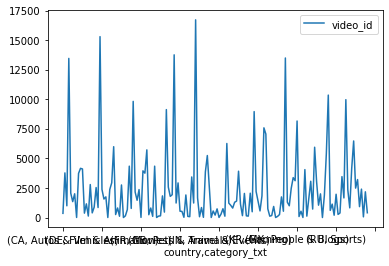

In [25]:
countries_content.plot()

In [167]:
countries_content.columns

Index(['video_id'], dtype='object')

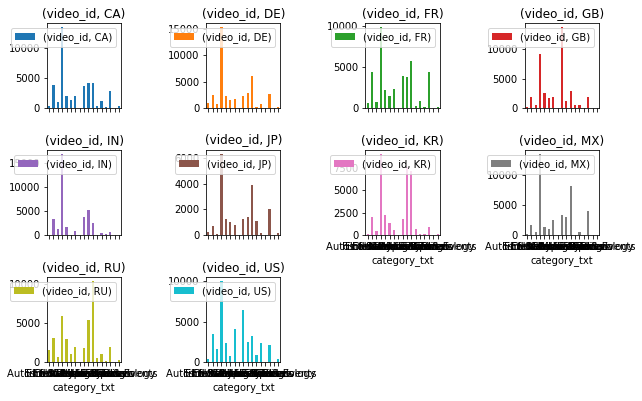

In [26]:
ax = countries_content.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(4, 4))
plt.tight_layout()

In [11]:
# settings
pd.options.plotting.backend = "plotly"

# sample dataframe of a wide format
'''
np.random.seed(4); cols = list('abc')
X = np.random.randn(50,len(cols))  
df=pd.DataFrame(X, columns=cols)
df.iloc[0]=0;
'''


# plotly figure
fig = df.plot(template = 'plotly_dark')

app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Random datastream"),
            dcc.Interval(
            id='interval-component',
            interval=1*1000, # in milliseconds
            n_intervals=0
        ),
    dcc.Graph(id='graph'),
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input('interval-component', "n_intervals")]
)
def streamFig(value):
    
    global df
    
    Y = np.random.randn(1,len(cols))  
    df2 = pd.DataFrame(Y, columns = cols)
    df = df.append(df2, ignore_index=True)#.reset_index()
    df.tail()
    df3=df.copy()
    df3 = df3.cumsum()
    fig = df3.plot(template = 'plotly_dark')
    #fig.show()
    return(fig)

app.run_server(mode='inline', port = 8090, dev_tools_ui=True, #debug=True,
              dev_tools_hot_reload =True, threaded=True)

ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [ ]:
def create_indexed_columns(date, df, top_level_name=""):
    """Returns indexed columns for given dataframe"""

    # find index of the date that is closest to our reference date
    closest_date_index = df.index.get_loc(date, method="nearest")

    # get the values in the initial columns for the reference date 
    reference_values = df.iloc[closest_date_index]['Adj Close']

    # divide initial columns by values at ref. date and store in intermediate df
    inter_df = df['Adj Close'].div(reference_values)*100 - 100

    # create a multindex for the intermediate df using the date as top-level index
    closest_date = df.index[closest_date_index]
    inter_df.columns = pd.MultiIndex.from_product(
                    [[top_level_name if top_level_name else str(closest_date)], inter_df.columns])
    
    return inter_df, closest_datedef create_indexed_columns(date, df, top_level_name=""):
    """Returns indexed columns for given dataframe"""

    # find index of the date that is closest to our reference date
    closest_date_index = df.index.get_loc(date, method="nearest")

    # get the values in the initial columns for the reference date 
    reference_values = df.iloc[closest_date_index]['Adj Close']

    # divide initial columns by values at ref. date and store in intermediate df
    inter_df = df['Adj Close'].div(reference_values)*100 - 100

    # create a multindex for the intermediate df using the date as top-level index
    closest_date = df.index[closest_date_index]
    inter_df.columns = pd.MultiIndex.from_product(
                    [[top_level_name if top_level_name else str(closest_date)], inter_df.columns])
    
    return inter_df, closest_date